In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('./archive.zip',usecols=['Survived','Age','Fare'])
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [6]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [7]:
x

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875
...,...,...
413,NaN,8.0500
414,39.0,108.9000
415,38.5,7.2500
416,NaN,8.0500


In [8]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [11]:
x_train.head()

,Age,Fare
109,18.5,13.0000
176,20.0,36.7500
366,NaN,14.4583
407,50.0,211.5000
280,23.0,8.6625


In [12]:
len(x_train),len(y_train)

(280, 280)

In [13]:
len(x_test),len(y_test)

(138, 138)

## End of distribution

In [15]:
import warnings
warnings.filterwarnings('ignore')

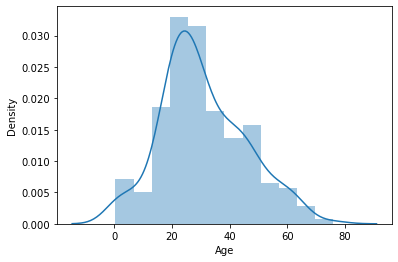

In [16]:
sns.distplot(x_train['Age'])
plt.show()

In [17]:
x_train['Age'].isnull().sum()

59

In [19]:
c=x_train['Age'].mean()+3*x_train['Age'].std()
c

74.97527993501252

In [20]:
x_train['Age_replace']=x_train['Age'].fillna(c)

In [21]:
x_train

,Age,Fare,Age_replace
109,18.5,13.0000,18.50000
176,20.0,36.7500,20.00000
366,NaN,14.4583,74.97528
407,50.0,211.5000,50.00000
280,23.0,8.6625,23.00000
...,...,...,...
71,21.0,7.8958,21.00000
106,21.0,7.8208,21.00000
270,46.0,75.2417,46.00000
348,24.0,13.5000,24.00000


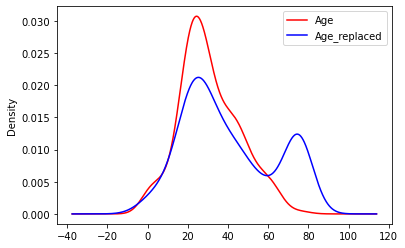

In [22]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x_train['Age'].plot(kind='kde',color='r',ax=ax,label='Age')
x_train['Age_replace'].plot(kind='kde',color='b',ax=ax,label='Age_replaced')
plt.legend(loc=0)
plt.show()

## For the test

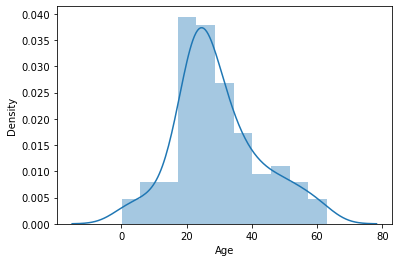

In [23]:
sns.distplot(x_test['Age'])
plt.show()

In [24]:
x_test['Age'].isnull().sum()

27

In [27]:
x_test['Age_replaced']=x_test['Age'].fillna(c)

In [28]:
x_test

,Age,Fare,Age_replaced
321,25.0,7.2292,25.00000
324,39.0,211.3375,39.00000
388,21.0,7.7500,21.00000
56,35.0,7.8958,35.00000
153,36.0,12.1833,36.00000
...,...,...,...
371,31.0,134.5000,31.00000
399,31.0,7.7333,31.00000
272,26.0,136.7792,26.00000
400,30.0,164.8667,30.00000


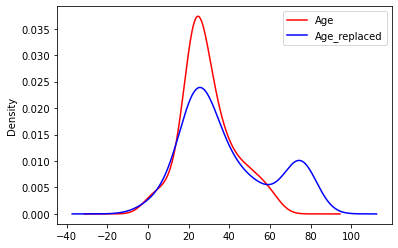

In [30]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x_test['Age'].plot(kind='kde',color='r',ax=ax,label='Age')
x_test['Age_replaced'].plot(kind='kde',color='b',ax=ax,label='Age_replaced')
plt.legend(loc=0)
plt.show()

##  FOR FARE COLUMN

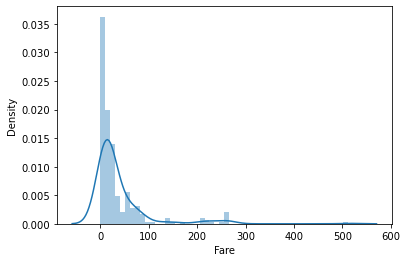

In [31]:
sns.distplot(x_train['Fare'])
plt.show()

In [32]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [34]:
x_test['Fare']

321      7.2292
324    211.3375
388      7.7500
56       7.8958
153     12.1833
         ...   
371    134.5000
399      7.7333
272    136.7792
400    164.8667
380      7.7500
Name: Fare, Length: 138, dtype: float64

In [35]:
IQR=x_test['Fare'].quantile(0.75)-x_test['Fare'].quantile(0.25)

In [36]:
IQR

19.8542

In [37]:
b=x_test['Fare'].quantile(0.75)+1.5*IQR


In [39]:
x_test['Fare_replaced']=x_test['Fare'].fillna(b)

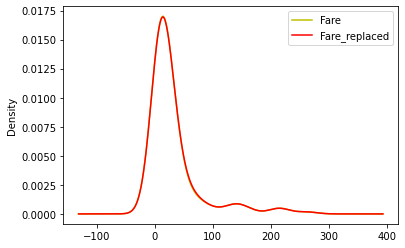

In [40]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x_test['Fare'].plot(kind='kde',color='y',ax=ax,label='Fare')
x_test['Fare_replaced'].plot(kind='kde',color='r',ax=ax,label='Fare_replaced')
plt.legend(loc=0)
plt.show()